In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap(projection='cyl')

In [5]:
# Get data
df_main = pd.read_csv("processed_headlines_locations.csv")
df_latlong = df_main[['latitude', 'longitude']].copy()
list_latlong = df_latlong.values.tolist()

latitudes, longitudes = np.array(list_latlong).T

locations = [[latitudes[i], longitudes[i]]
          for i in range(len(latitudes))]

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km    
    
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d


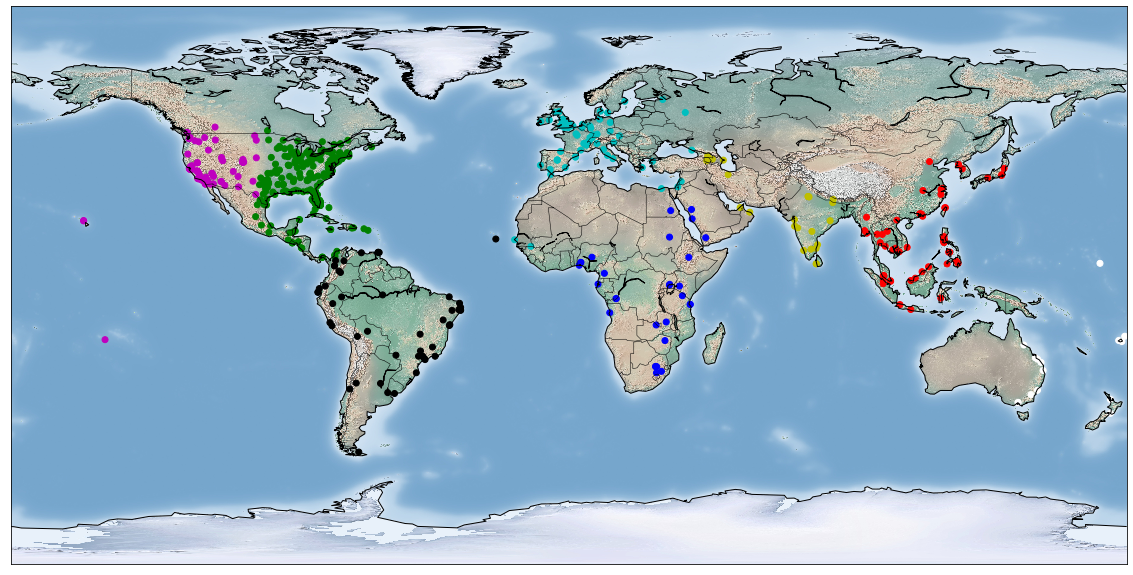

In [6]:
# Using K-Means
loc_clusters = KMeans(8).fit_predict(locations)

colors = [['b', 'g', 'r','c','m','w','k', 'y'][cluster] for cluster in  loc_clusters]

fig = plt.figure(figsize=(20, 12))
map_plotter.scatter(longitudes, latitudes, latlon=True, color=colors)
map_plotter = Basemap(projection='cyl')
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.shadedrelief()

plt.show()

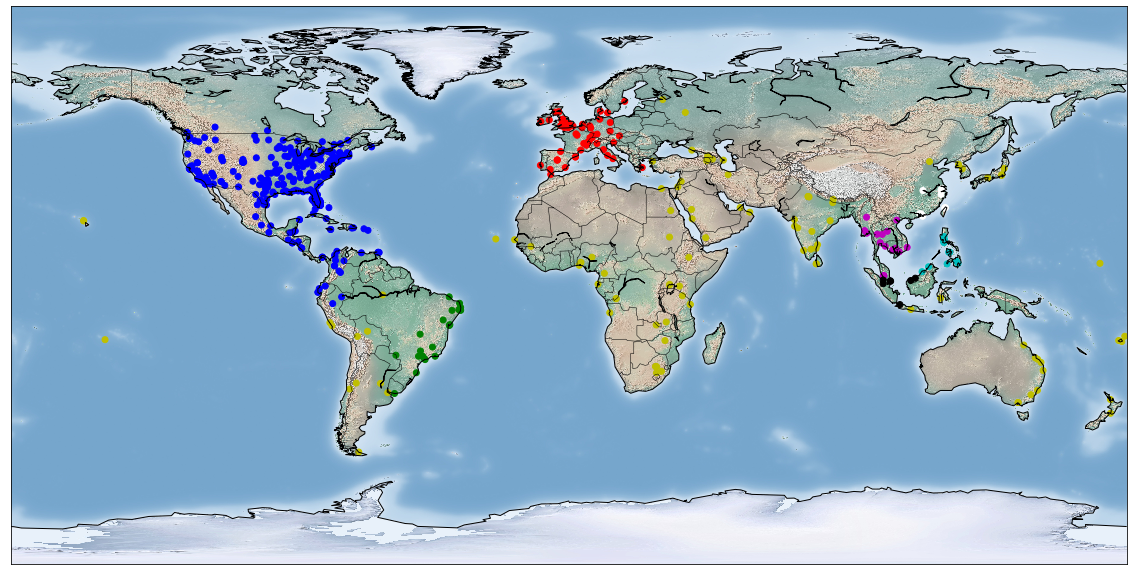

In [7]:
# Using DBSCAN

epsilon=1000
min_points = 10

cluster_model = DBSCAN(eps=epsilon, min_samples=min_points, metric=distance)
location_clusters = cluster_model.fit_predict(locations)
colors = [['b', 'g', 'r','c','m','w','k', 'y'][location] for location in location_clusters]

fig = plt.figure(figsize=(20, 12))
map_plotter.scatter(longitudes, latitudes, latlon=True, color=colors)
map_plotter = Basemap(projection='cyl')
map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.shadedrelief()

plt.show()